In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Popular_apps.csv")

In [3]:
pd.options.display.max_columns = 30

In [4]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth
0,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,50000.0,62433.0,True,0.0,USD,3.5,4.1 and up,Free 2021 Themes for Emoji keyboard,2019-09-22,2020-10-07,Everyone,True,False,False,0.0,2019-09,2020-10
1,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),com.jieapp.taoyuanmetro,Travel & Local,3.9,118.0,10000.0,10000.0,37763.0,True,0.0,USD,7.6,4.2 and up,Jie App,2018-04-03,2021-06-11,Everyone,True,False,False,0.0,2018-04,2021-06
2,Caliway Conductor,com.caliwayconductor.driver,Travel & Local,3.7,1572.0,10000.0,10000.0,42856.0,True,0.0,USD,29.0,4.2 and up,WayCali,2018-09-05,2020-05-30,Everyone,False,False,False,0.0,2018-09,2020-05
3,REDMOND Robot,com.grit.redmond,Lifestyle,3.7,328.0,10000.0,10000.0,31235.0,True,0.0,USD,70.0,4.1 and up,Grit Technology,2020-07-01,2021-05-26,Everyone,False,False,False,0.0,2020-07,2021-05
4,Block Fill: Puzzle Game,com.mailbeegames.casual.brain.line.block.puzzl...,Puzzle,4.4,211.0,10000.0,10000.0,15471.0,True,0.0,USD,16.0,5.0 and up,MailBee Games,2020-03-13,2020-05-11,Everyone,True,True,False,0.0,2020-03,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460252,La Sicilia Edicola Digitale,andr.lasicilia.agrigento,Entertainment,2.7,81.0,10000.0,10000.0,20415.0,True,0.0,USD,22.0,4.0.3 and up,Domenico Sanfilippo Editore S.p.A.,2015-04-16,2020-04-06,Everyone,True,False,False,0.0,2015-04,2020-04
460253,Driving Day,com.day.drivingday,Entertainment,2.8,1002.0,500000.0,500000.0,590469.0,True,0.0,USD,2.8,4.0.3 and up,maan1patel0,2020-06-10,2020-06-10,Everyone,True,False,False,0.0,2020-06,2020-06
460254,Hopeless 2: Cave Escape,com.upopa.hopeless2,Action,4.3,103466.0,5000000.0,5000000.0,7274660.0,True,0.0,USD,37.0,4.0.3 and up,Upopa Games,2015-10-29,2017-03-06,Teen,True,True,False,0.0,2015-10,2017-03
460255,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,500000.0,500000.0,814548.0,True,0.0,USD,4.1,2.2 and up,Single Cell Software,2014-12-11,2014-12-11,Everyone,False,False,False,0.0,2014-12,2014-12


### Top 5 Categories by Number of Apps

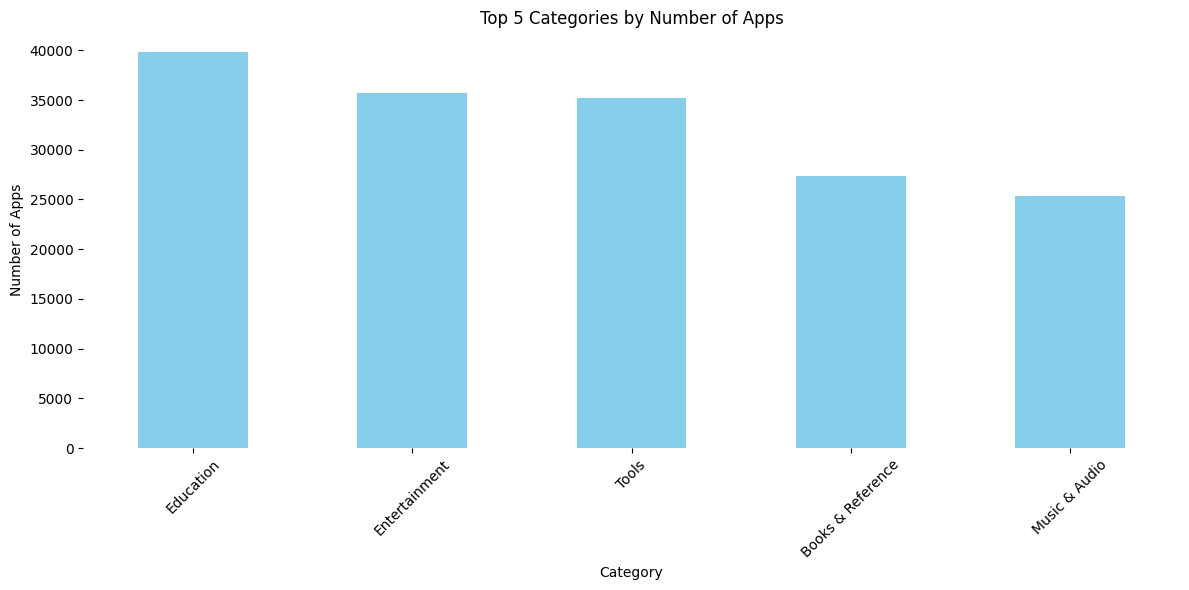

In [34]:
category_counts = df['Category'].value_counts()
top_categories = category_counts.head()
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Categories by Number of Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()


### Top 5 Categories by Average Rating

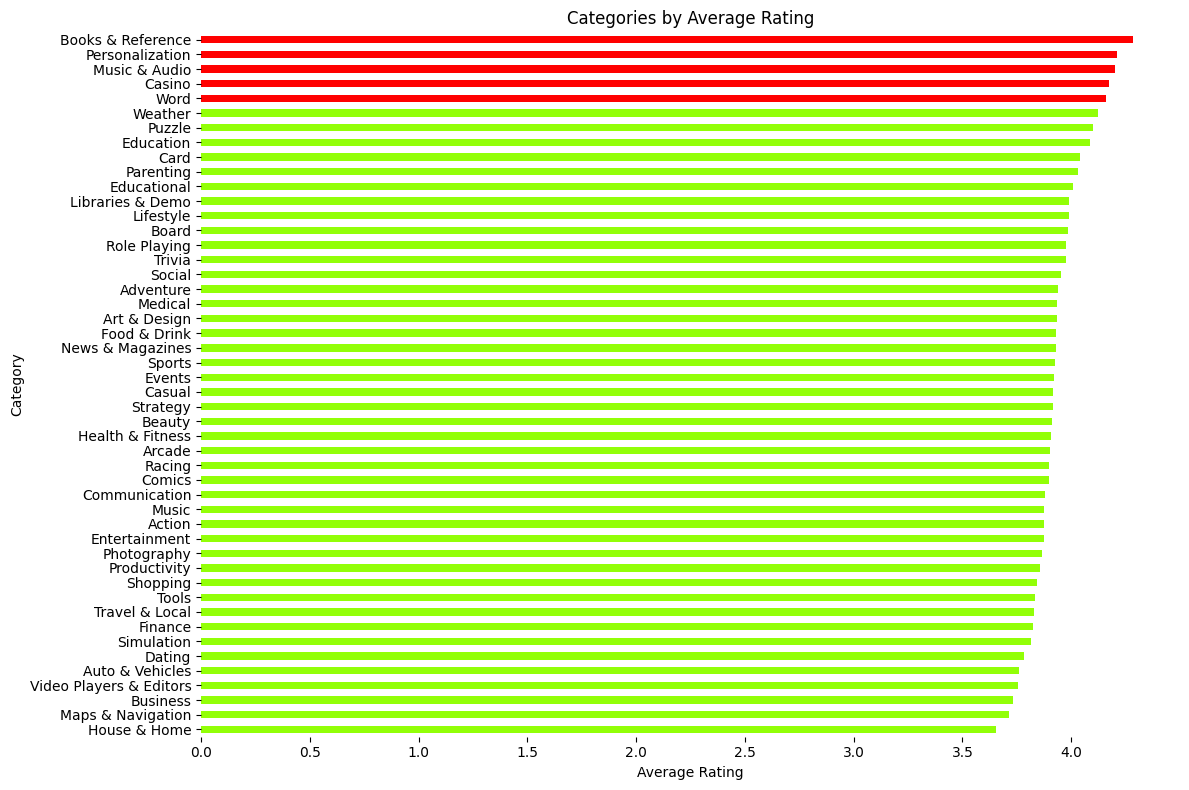

In [42]:
top_categories_by_rating = df.groupby('Category')['Rating'].mean()
colors = ["#92FF07"]*43 + ["#FF0000"] *5

 
top_categories_by_rating_reversed = top_categories_by_rating.iloc[::-1]

plt.figure(figsize=(12, 8))
top_categories_by_rating_reversed.sort_values().plot(kind='barh', color=colors)  # Use 'barh' for horizontal bar plot

plt.title('Categories by Average Rating')
plt.xlabel('Average Rating')  
plt.ylabel('Category')       
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()

plt.show()

### Top 5 Categories by Total Downloads

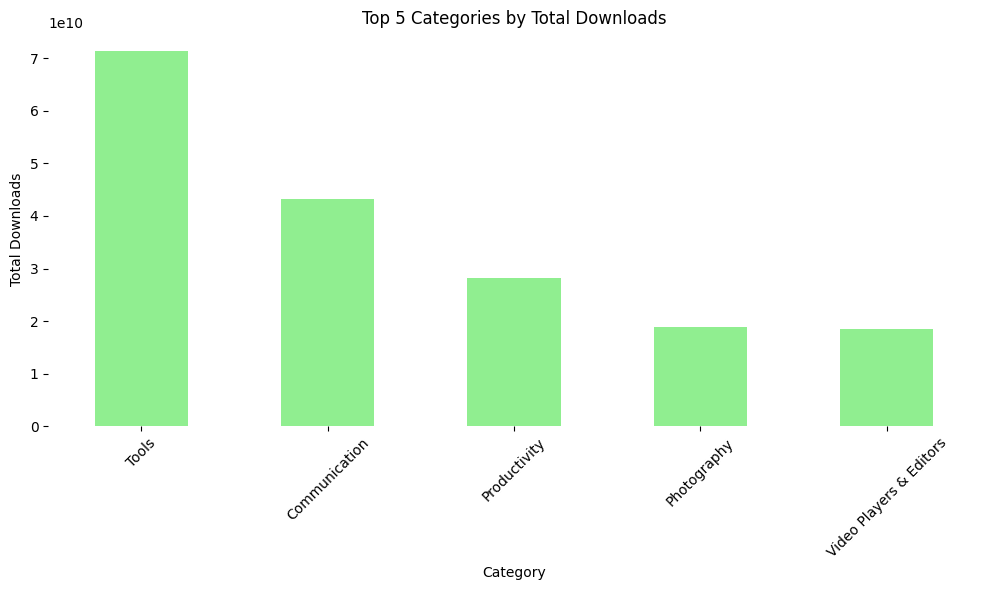

In [7]:
top_categories_by_downloads = df.groupby('Category')['Installs'].sum().nlargest(5)
plt.figure(figsize=(10, 6))

top_categories_by_downloads.plot(kind='bar', color='lightgreen')

plt.title('Top 5 Categories by Total Downloads')
plt.xlabel('Category')                         
plt.ylabel('Total Downloads')
plt.xticks(rotation=45)
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()

### Distribution of Downloads by Category

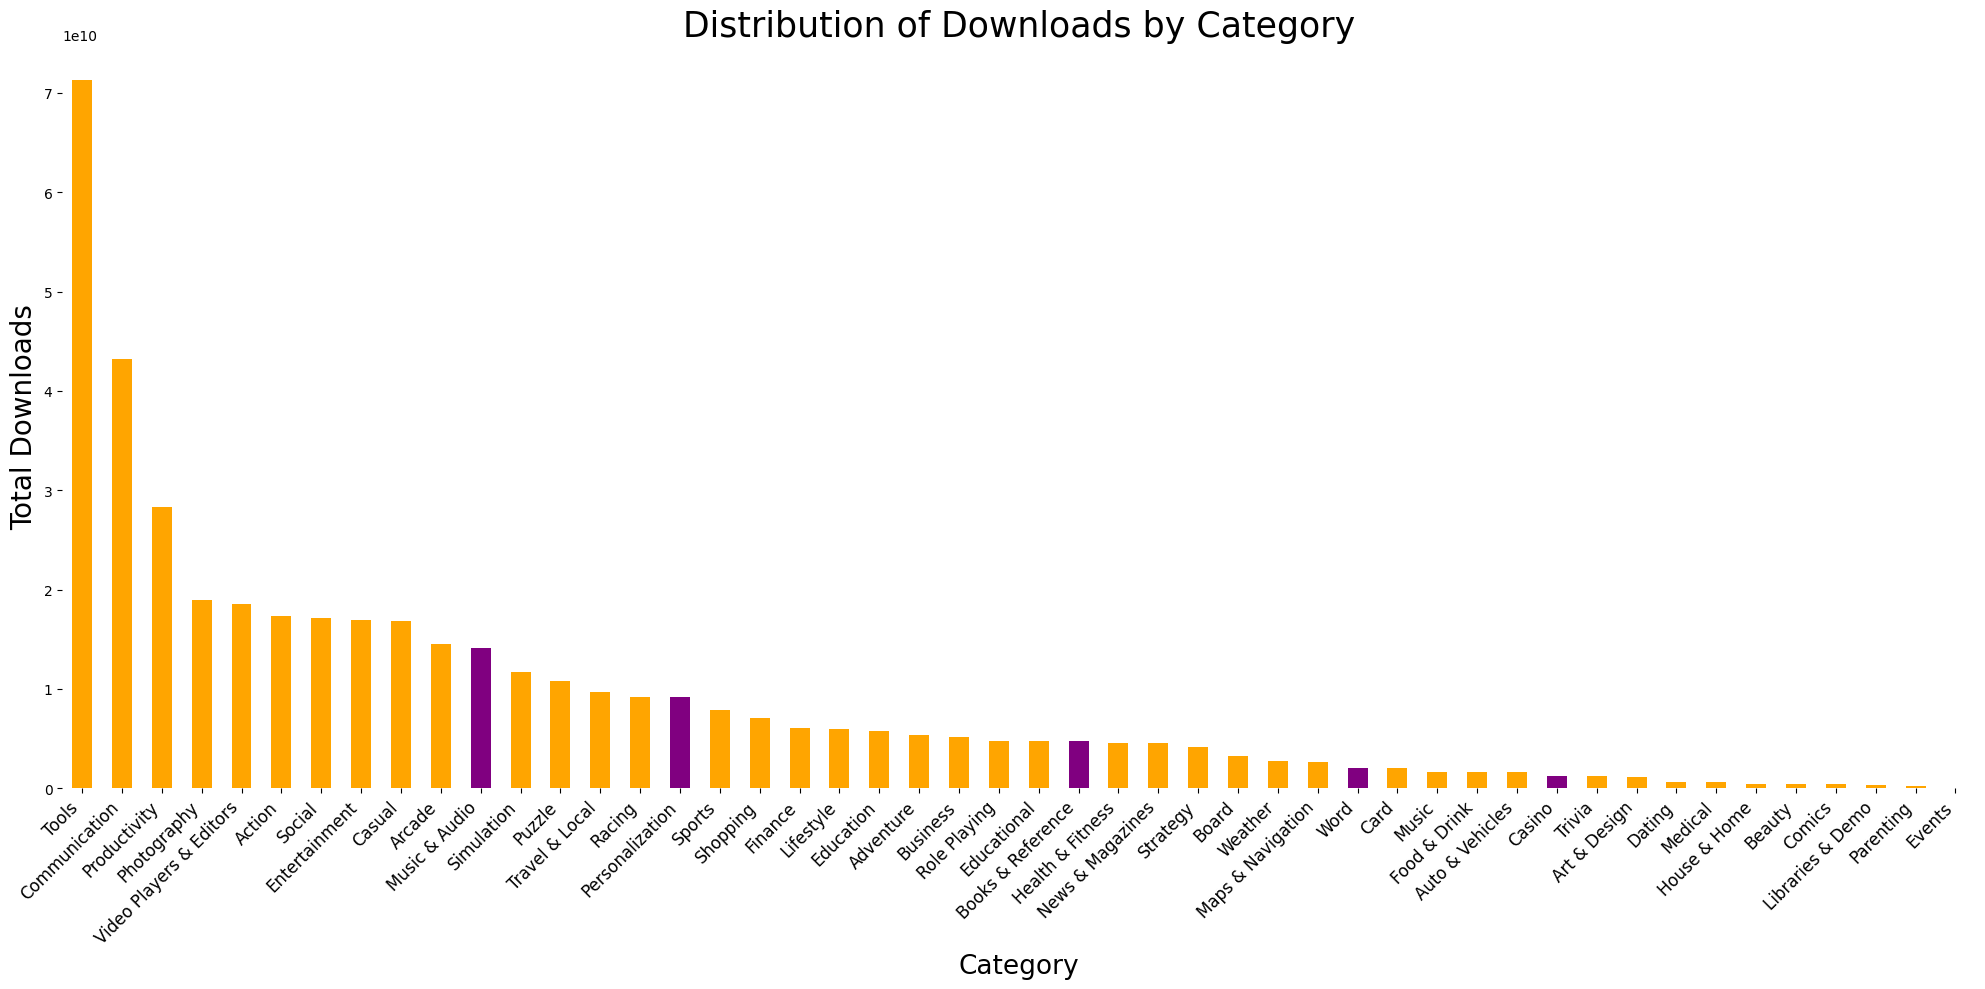

In [96]:
downloads_distribution = df.groupby('Category')['Installs'].sum()

colors = ["#FFA500"]*10 + ["#800080"] +["#FFA500"]*4 +["#800080"] +["#FFA500"]*9 + ["#800080"]+["#FFA500"]*6 +["#800080"] +["#FFA500"]*4+ ["#800080"]+["#FFA500"]*10

plt.figure(figsize=(20, 10))
downloads_distribution.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Distribution of Downloads by Category', fontsize=25)
plt.xlabel('Category',fontsize=19)
plt.ylabel('Total Downloads', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12) 
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()

In [9]:
df.loc[df["Category"]=="Tools", "Installs"].sum()

71316870000.0

### Distribution of Ratings by Category

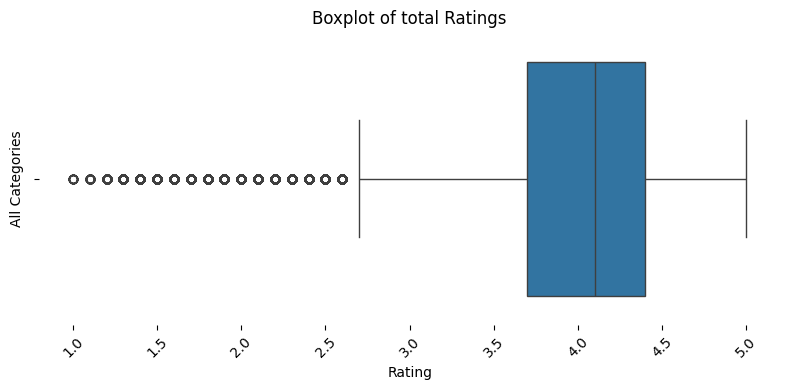

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Rating')
plt.title('Boxplot of total Ratings')
plt.ylabel('All Categories')
plt.xticks(rotation=45)
sns.despine(top=True, bottom=True, left=True)

plt.tight_layout()
plt.show()

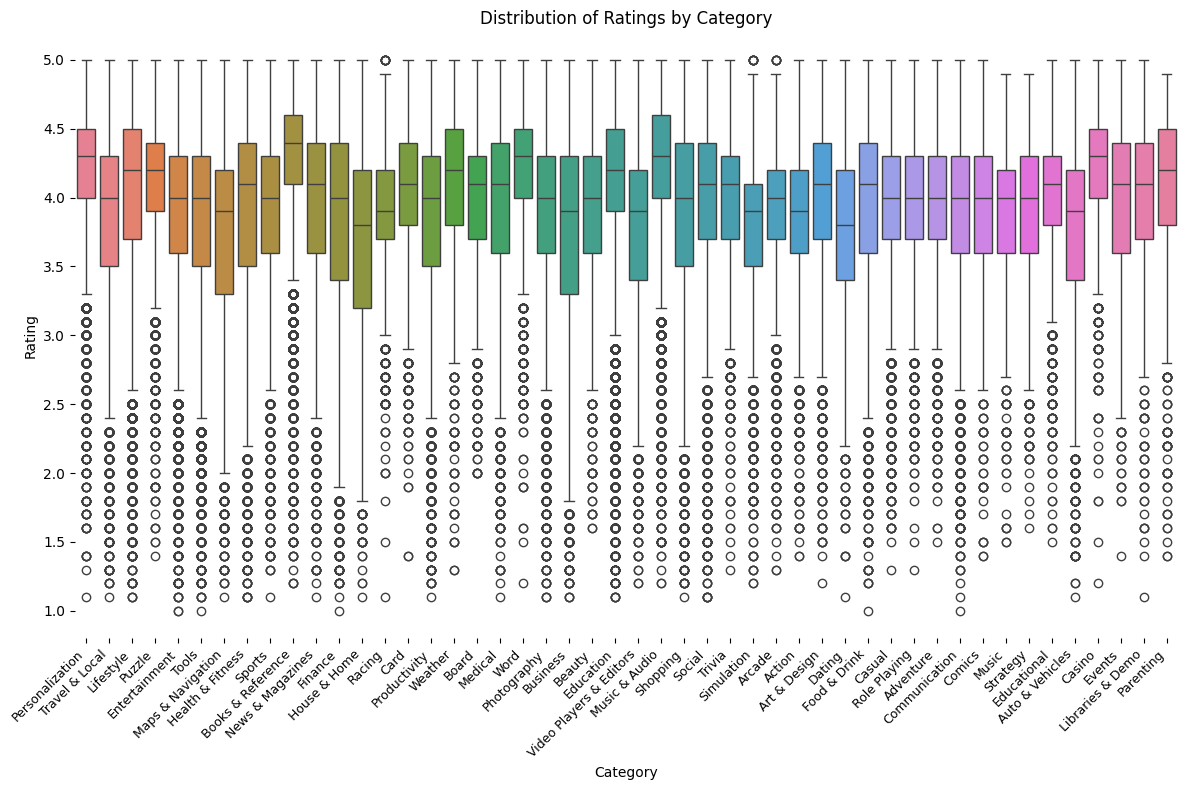

In [11]:
legit_votes_threshold = 10
legit_ratings_df = df[df['Rating Count'] > legit_votes_threshold]


plt.figure(figsize=(12, 8))

sns.boxplot(x='Category', y='Rating', data=legit_ratings_df, hue='Category', legend=False)

plt.title('Distribution of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
sns.despine(top=True, bottom=True,left=True)
plt.show()

### App Rating vs. Number of Installs

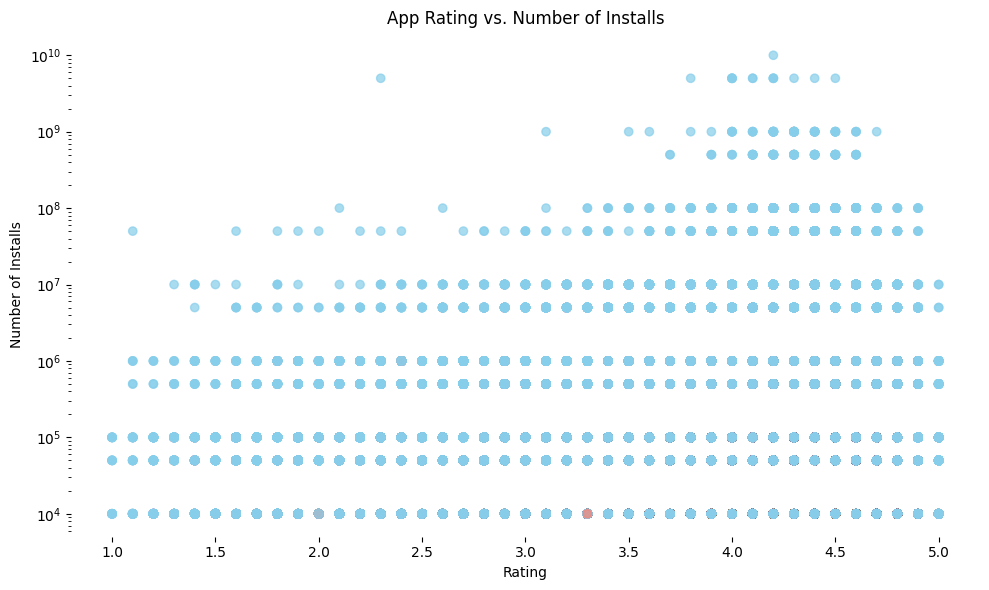

In [12]:


colors = df['Free'].map({True: 'skyblue', False: 'salmon'})


plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Installs'], c=colors, alpha=0.7)
plt.title('App Rating vs. Number of Installs')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.xscale('linear')  # Set the scale of x-axis to linear
plt.yscale('log')     # Set the scale of y-axis to logarithmic

sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()

In [13]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth
0,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,50000.0,62433.0,True,0.0,USD,3.5,4.1 and up,Free 2021 Themes for Emoji keyboard,2019-09-22,2020-10-07,Everyone,True,False,False,0.0,2019-09,2020-10
1,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),com.jieapp.taoyuanmetro,Travel & Local,3.9,118.0,10000.0,10000.0,37763.0,True,0.0,USD,7.6,4.2 and up,Jie App,2018-04-03,2021-06-11,Everyone,True,False,False,0.0,2018-04,2021-06
2,Caliway Conductor,com.caliwayconductor.driver,Travel & Local,3.7,1572.0,10000.0,10000.0,42856.0,True,0.0,USD,29.0,4.2 and up,WayCali,2018-09-05,2020-05-30,Everyone,False,False,False,0.0,2018-09,2020-05
3,REDMOND Robot,com.grit.redmond,Lifestyle,3.7,328.0,10000.0,10000.0,31235.0,True,0.0,USD,70.0,4.1 and up,Grit Technology,2020-07-01,2021-05-26,Everyone,False,False,False,0.0,2020-07,2021-05
4,Block Fill: Puzzle Game,com.mailbeegames.casual.brain.line.block.puzzl...,Puzzle,4.4,211.0,10000.0,10000.0,15471.0,True,0.0,USD,16.0,5.0 and up,MailBee Games,2020-03-13,2020-05-11,Everyone,True,True,False,0.0,2020-03,2020-05


In [14]:
df["Free"].value_counts()

Free
True     455518
False      4739
Name: count, dtype: int64

### Distribution of App Ratings

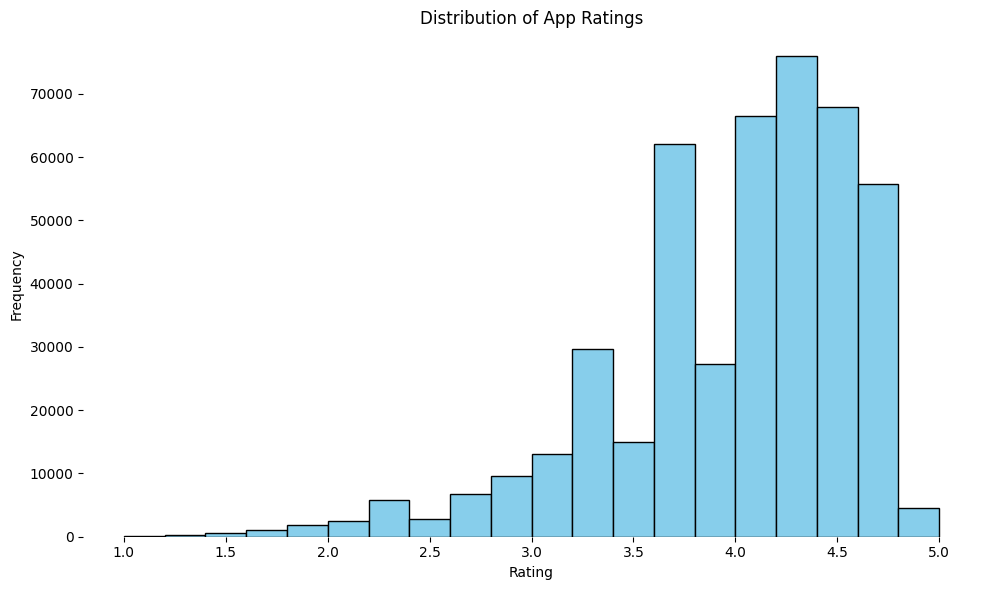

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.despine(top=True, bottom=True,left=True)

plt.tight_layout()
plt.show()


### Number of Free vs. Paid Apps by Category

<Figure size 3000x4500 with 0 Axes>

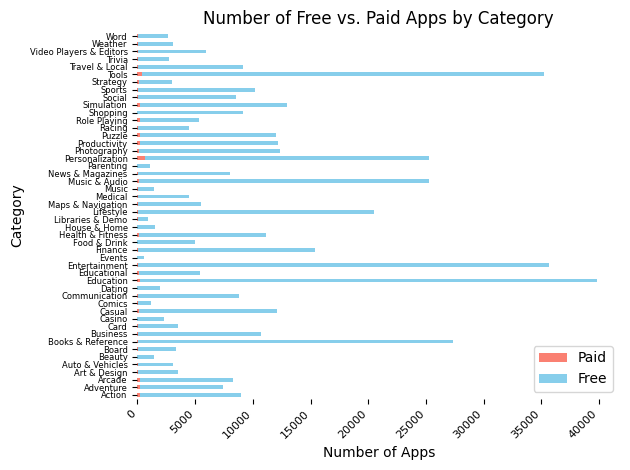

In [86]:
plt.figure(figsize=(30, 45))  
df.groupby(['Category', 'Free']).size().unstack().plot(kind='barh', stacked=True, color=['salmon', 'skyblue'])
plt.title('Number of Free vs. Paid Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=6)
plt.legend(['Paid', 'Free'])
sns.despine(top=True, bottom=True, left=True)


plt.tight_layout()
plt.show()

### Number of Apps Released and Updated Over Time'

In [17]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Released'] = pd.to_datetime(df['Released'])

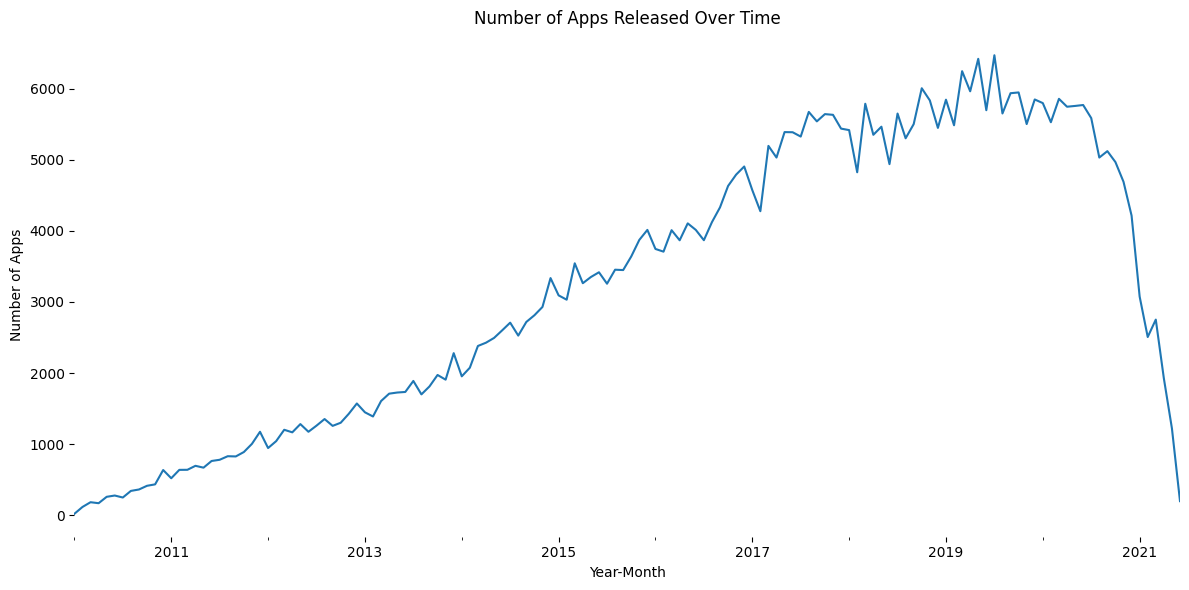

In [97]:

# Extract year and month from 'Released'
df['Released_YearMonth'] = df['Released'].dt.to_period('M')

# Count the number of apps released and updated each month
released_counts = df['Released_YearMonth'].value_counts().sort_index()

# Create a time trend plot
plt.figure(figsize=(12, 6))
released_counts.plot(label='Released')
plt.title('Number of Apps Released Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Apps')


sns.despine(top=True, bottom=True,left=True)


plt.tight_layout()
plt.show()

### Number of Apps by Ad Supported Status

In [19]:
df.loc[df['Released']==df['Released'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth
91564,Kingdom of Pirates,com.garena.game.bb,Role Playing,NaN,NaN,100000.0,100000.0,198983.0,True,0.0,USD,69.0,4.4 and up,Garena International II Private Limited,2021-06-15,2021-06-16,Teen,False,True,False,0.0,2021-06,2021-06
121896,Battle Cars: Monster Hunter,com.abi.battle.car.monster.shooter,Action,NaN,NaN,100000.0,100000.0,169189.0,True,0.0,USD,148.0,5.0 and up,ONESOFT,2021-06-15,2021-06-16,Everyone 10+,True,True,False,0.0,2021-06,2021-06
283348,Moj Lite,in.mohalla.video.lite,Social,NaN,NaN,1000000.0,1000000.0,2036808.0,True,0.0,USD,17.0,4.1 and up,ShareChat,2021-06-15,2021-06-15,Teen,True,False,False,0.0,2021-06,2021-06
435547,Eroblast: Waifu Dating Sim,com.vividgames.right.swipes.hot.dates,Puzzle,4.2,2377.0,100000.0,100000.0,100531.0,True,0.0,USD,135.0,6.0 and up,Vivid Games S.A.,2021-06-15,2021-06-11,Mature 17+,True,True,False,0.0,2021-06,2021-06


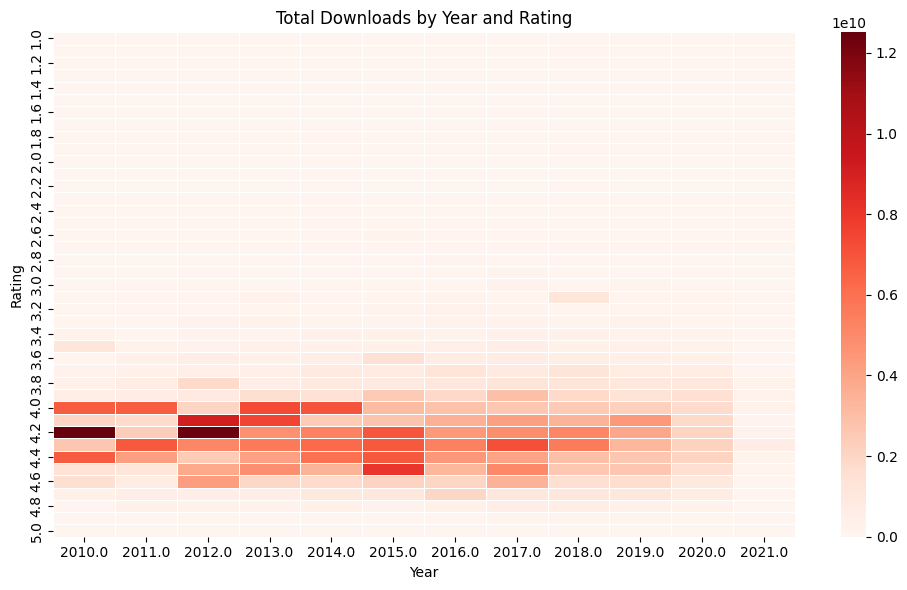

In [20]:
df['Year'] = pd.to_datetime(df['Released']).dt.year

# Create pivot table
pivot_table = df.pivot_table(index='Rating', columns='Year', values='Installs', aggfunc='sum', fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Reds', fmt='d', linewidths=.5, annot=False)

plt.title('Total Downloads by Year and Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

ValueError: Unknown format code 'd' for object of type 'float'

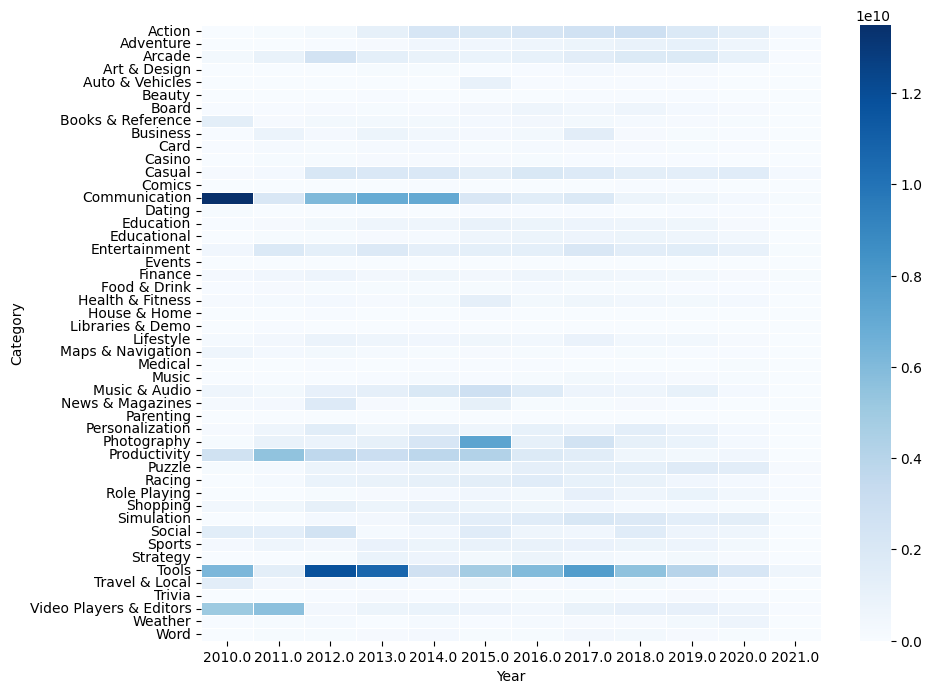

In [21]:
pivot_table = df.pivot_table(index='Category', columns='Year', values='Installs', aggfunc='sum', fill_value=0)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d', linewidths=.5, yticklabels=pivot_table.index, annot_kws={"size": 10})

plt.title('Total Downloads by Category and Year')
plt.xlabel('Year')
plt.ylabel('Category')
plt.yticks(fontsize=1)
plt.tight_layout()
plt.show()

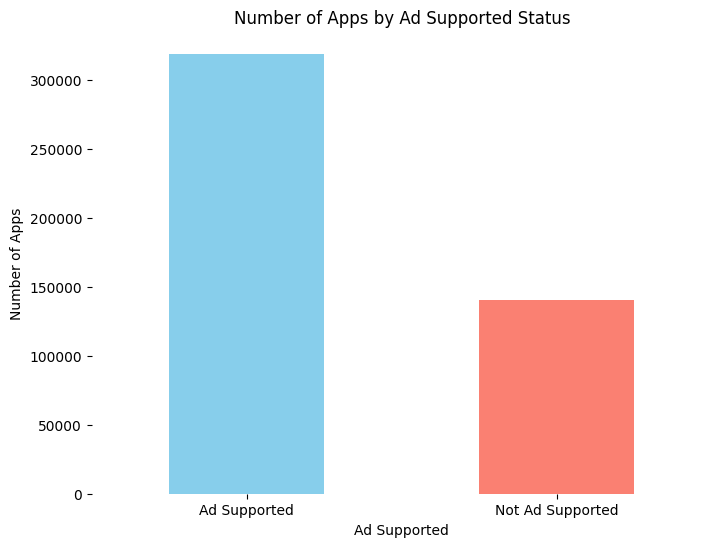

In [98]:
ad_supported_counts = df['Ad Supported'].value_counts()

plt.figure(figsize=(8, 6))
ad_supported_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Apps by Ad Supported Status')
plt.xlabel('Ad Supported')
plt.ylabel('Number of Apps')
plt.xticks(ticks=[0, 1], labels=['Ad Supported', 'Not Ad Supported'], rotation=0)
sns.despine(top=True, bottom=True,left=True)

plt.show()

In [23]:
df["Ad Supported"].value_counts()

Ad Supported
True     319310
False    140947
Name: count, dtype: int64

### Number of Apps by In app Purchase

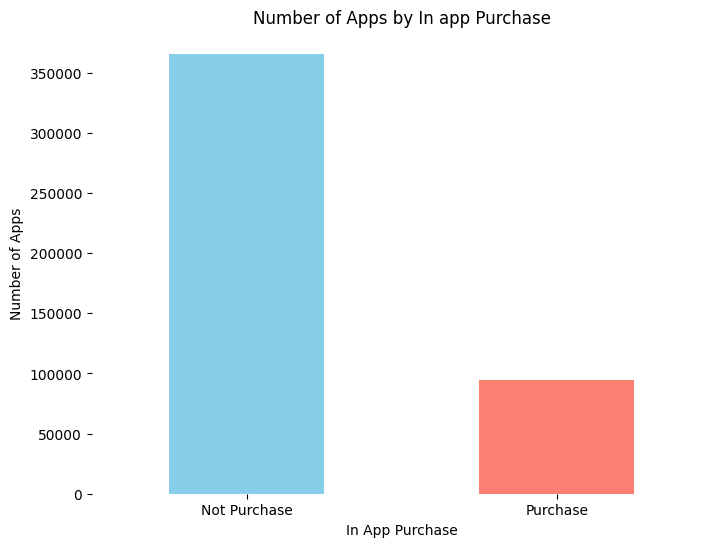

In [24]:
ad_supported_counts = df['In App Purchases'].value_counts()

plt.figure(figsize=(8, 6))
ad_supported_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Apps by In app Purchase')
plt.xlabel('In App Purchase')
plt.ylabel('Number of Apps')
plt.xticks(ticks=[0, 1], labels=['Not Purchase', 'Purchase'], rotation=0)
sns.despine(top=True, bottom=True,left=True)

plt.show()

In [25]:
df["In App Purchases"].value_counts()

In App Purchases
False    365835
True      94422
Name: count, dtype: int64

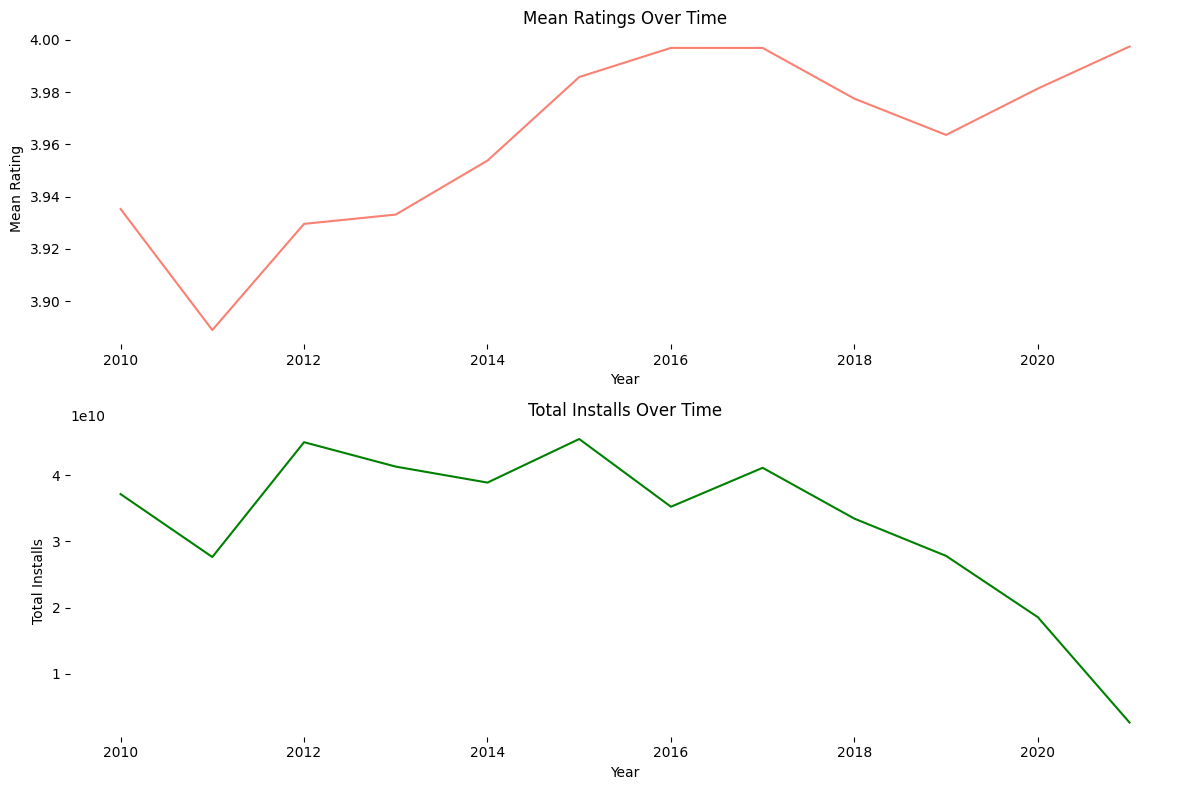

In [26]:
# Group by 'Released' year and count the number of apps released each year
app_releases = df.groupby(df['Released'].dt.year).size()

# Group by 'Released' year and calculate mean rating for each year
mean_ratings_over_time = df.groupby(df['Released'].dt.year)['Rating'].mean()

# Group by 'Released' year and calculate total installs for each year
installs_over_time = df.groupby(df['Released'].dt.year)['Installs'].sum()

# Create subplots for mean ratings and total installs
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Plot mean ratings over time
axes[0].plot(mean_ratings_over_time.index, mean_ratings_over_time.values, label='Mean Rating', color='salmon')
axes[0].set_title('Mean Ratings Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Rating')
sns.despine(top=True, bottom=True,left=True)

# Plot total installs over time
axes[1].plot(installs_over_time.index, installs_over_time.values, label='Total Installs', color='green')
axes[1].set_title('Total Installs Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Installs')
sns.despine(top=True, bottom=True,left=True)


plt.tight_layout()
plt.show()


In [62]:
df.loc[(df["Category"] == "Communication") & (df["Installs"])].sort_values(by="Maximum Installs")

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth,Year
63575,"Nodesk VPN - Best, Free and Unlimited Bandwidth",com.assets.nodeskvpn,Communication,4.0,134.0,1.000000e+04,1.000000e+04,1.350200e+04,True,0.0,USD,6.4,4.1 and up,Geeklord,2020-07-01,2021-04-01,Everyone,True,True,False,0.0,2020-07,2021-04,2020.0
245944,UNIVERGE ST465,com.nec.android.endd.univerge.st.imeru,Communication,2.5,21.0,1.000000e+04,1.000000e+04,1.350700e+04,True,0.0,USD,6.0,5.0 and up,NEC Corporation,NaT,2019-07-31,Everyone,False,False,False,0.0,NaT,2019-07,NaN
338348,CATV mobile ポータルアプリ,jp.uqmobile.catvmobileapp,Communication,4.2,11.0,1.000000e+04,1.000000e+04,1.350700e+04,True,0.0,USD,1.6,4.0 and up,"NetVision Co.,Ltd. Shizuoka Japan",NaT,2020-08-26,Everyone,False,False,False,0.0,NaT,2020-08,NaN
424845,Contact Backup,com.massiveapps.contactbackup,Communication,3.9,34.0,1.000000e+04,1.000000e+04,1.350900e+04,True,0.0,USD,2.0,2.2 and up,massiveapps,2015-03-21,2015-03-23,Everyone,True,False,False,0.0,2015-03,2015-03,2015.0
169545,Coffee Cup Photo Frame,com.Photo.frame_Coffee.Cup.Photo.Frames,Communication,NaN,NaN,1.000000e+04,1.000000e+04,1.351000e+04,True,0.0,USD,14.0,4.1 and up,Pretz dev,2017-03-05,2021-04-17,Everyone,True,False,False,0.0,2017-03,2021-04,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184211,Hangouts,com.google.android.talk,Communication,4.0,5072462.0,5.000000e+09,5.000000e+09,5.019518e+09,True,0.0,USD,NaN,Varies with device,Google LLC,2013-05-15,2021-05-14,Everyone,False,False,False,0.0,2013-05,2021-05,2013.0
417339,Messenger – Text and Video Chat for Free,com.facebook.orca,Communication,4.0,78563229.0,5.000000e+09,5.000000e+09,5.054312e+09,True,0.0,USD,NaN,Varies with device,Facebook,2014-01-30,2021-06-14,Everyone,False,True,True,0.0,2014-01,2021-06,2014.0
76740,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,5.000000e+09,5.000000e+09,6.265638e+09,True,0.0,USD,NaN,Varies with device,WhatsApp LLC,2010-10-18,2021-06-09,Everyone,False,False,True,0.0,2010-10,2021-06,2010.0
418064,Gmail,com.google.android.gm,Communication,4.2,9488421.0,5.000000e+09,5.000000e+09,8.756574e+09,True,0.0,USD,NaN,Varies with device,Google LLC,2010-09-21,2021-06-16,Everyone,True,False,False,0.0,2010-09,2021-06,2010.0


In [66]:
df.loc[(df["Category"] == "Tools") & (df["Installs"])].sort_values(by="Maximum Installs")

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth,Year
289674,تحميل الفيديوهات من انستجرام فيس بوك تويتر,com.download.videos.hammelApp,Tools,3.8,157.0,1.000000e+04,1.000000e+04,1.350200e+04,True,0.0,USD,3.0,4.4 and up,The Golden AppX,2019-08-19,2019-08-19,Everyone,True,False,False,0.0,2019-08,2019-08,2019.0
416203,CFEMC,com.cfemc.smartapps,Tools,3.8,42.0,1.000000e+04,1.000000e+04,1.350300e+04,True,0.0,USD,5.6,4.4 and up,Coweta-Fayette EMC,2012-08-10,2020-12-24,Everyone,False,False,False,0.0,2012-08,2020-12,2012.0
343428,A1 Handyschutz,at.a1telekom.android.a1handyschutz2,Tools,3.8,101.0,1.000000e+04,1.000000e+04,1.350400e+04,True,0.0,USD,9.8,4.1 and up,A1 Telekom Austria AG,NaT,2019-02-22,Everyone,False,False,False,0.0,NaT,2019-02,NaN
399031,MyCOND,br.com.iplanner.mycondapp,Tools,4.1,101.0,1.000000e+04,1.000000e+04,1.350400e+04,True,0.0,USD,11.0,4.4 and up,App Condominial,2020-06-16,2021-05-19,Everyone,False,False,False,0.0,2020-06,2021-05,2020.0
455856,USSD Беларусь,by.unsofter.ussdbelarus,Tools,4.7,86.0,1.000000e+04,1.000000e+04,1.350500e+04,True,0.0,USD,1.7,4.0.3 and up,UnSofter,2019-03-06,2020-04-14,Everyone,False,False,False,0.0,2019-03,2020-04,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284412,Android System WebView,com.google.android.webview,Tools,4.0,6045686.0,1.000000e+09,1.000000e+09,4.764329e+09,True,0.0,USD,NaN,Varies with device,Google LLC,2015-03-10,2021-06-14,Everyone,False,False,False,0.0,2015-03,2021-06,2015.0
400452,Android Accessibility Suite,com.google.android.marvin.talkback,Tools,4.2,2666450.0,5.000000e+09,5.000000e+09,7.408135e+09,True,0.0,USD,NaN,Varies with device,Google LLC,NaT,2021-05-19,Everyone,False,False,False,0.0,NaT,2021-05,NaN
211129,Google Text-to-Speech,com.google.android.tts,Tools,4.1,254700.0,5.000000e+09,5.000000e+09,9.034405e+09,True,0.0,USD,NaN,Varies with device,Google LLC,2013-10-10,2021-03-29,Everyone,False,False,False,0.0,2013-10,2021-03,2013.0
353170,Google,com.google.android.googlequicksearchbox,Tools,4.2,19798962.0,5.000000e+09,5.000000e+09,9.154248e+09,True,0.0,USD,NaN,Varies with device,Google LLC,2010-08-12,2021-06-11,Everyone,True,False,False,0.0,2010-08,2021-06,2010.0


In [70]:
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')

# Filter the DataFrame to include only apps released in 2012
apps_2012 = df[df['Released'].dt.year == 2012]

# Sort the filtered DataFrame by 'Maximum Installs'
apps_2012_sorted = apps_2012.sort_values(by='Maximum Installs', ascending=False)

In [74]:
apps_2012_sorted.loc[apps_2012_sorted["Category"]=="Tools"]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth,Year
429030,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,1.000000e+10,1.000000e+10,1.205763e+10,True,0.00,USD,NaN,Varies with device,Google LLC,2012-05-24,2021-06-10,Everyone,False,False,False,0.00,2012-05,2021-06,2012.0
23971,ZArchiver,ru.zdevs.zarchiver,Tools,4.5,882787.0,1.000000e+08,1.000000e+08,1.638685e+08,True,0.00,USD,NaN,Varies with device,ZDevs,2012-01-24,2021-04-29,Everyone,False,False,False,0.00,2012-01,2021-04,2012.0
53089,Mi Telcel,com.speedymovil.wire,Tools,3.6,342768.0,1.000000e+08,1.000000e+08,1.615054e+08,True,0.00,USD,22.000000,5.0 and up,"Telcel, Radiomovil Dipsa S.A. de C.V.",2012-01-03,2021-06-01,Everyone,False,False,False,0.00,2012-01,2021-06,2012.0
180430,DiskDigger photo recovery,com.defianttech.diskdigger,Tools,3.8,406550.0,1.000000e+08,1.000000e+08,1.473637e+08,True,0.00,USD,4.300000,4.1 and up,"Defiant Technologies, LLC",2012-06-03,2021-06-14,Everyone,False,False,False,0.00,2012-06,2021-06,2012.0
49142,Kode,com.app.downloadmanager,Tools,4.2,1335340.0,1.000000e+08,1.000000e+08,1.229420e+08,True,0.00,USD,NaN,Varies with device,Mirmay Limited,2012-10-31,2021-04-29,Everyone,True,True,False,0.00,2012-10,2021-04,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245356,Conduit Bender Elite - Calc,cyberprodigy.conduit.bender.elite,Tools,4.3,207.0,1.000000e+04,1.000000e+04,1.359900e+04,False,7.99,USD,3.600000,5.0 and up,Cyberprodigy LLC,2012-11-11,2020-10-08,Everyone,False,False,False,8.95,2012-11,2020-10,2012.0
31710,"Voice ""Magyar"" for DVBeep",dimonvideo.beep.magyar,Tools,4.0,168.0,1.000000e+04,1.000000e+04,1.355900e+04,True,0.00,USD,0.458984,2.2 and up,DimonVideo,2012-12-10,2020-05-27,Everyone,False,False,False,0.00,2012-12,2020-05,2012.0
251701,Pipe Trades Pro Calculator,com.calculated.josephine,Tools,4.8,229.0,1.000000e+04,1.000000e+04,1.354600e+04,False,24.99,USD,7.500000,4.4 and up,Calculated Industries,2012-05-24,2020-10-29,Everyone,False,False,False,27.99,2012-05,2020-10,2012.0
328928,Easy Recognizer with Mushroom function,jp.ne.neko.freewing.EasyRecognizer,Tools,3.6,36.0,1.000000e+04,1.000000e+04,1.351300e+04,True,0.00,USD,0.053711,4.0 and up,FREE WING,2012-05-11,2021-01-12,Everyone,False,False,False,0.00,2012-05,2021-01,2012.0


In [29]:
df.loc[df["Rating Count"] == df["Rating Count"].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth,Year
76740,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,5.000000e+09,5.000000e+09,6.265638e+09,True,0.0,USD,NaN,Varies with device,WhatsApp LLC,2010-10-18,2021-06-09,Everyone,False,False,True,0.0,2010-10,2021-06,2010.0


In [30]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size(Mb)', 'Minimum Android', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Price_EUR', 'Released_YearMonth',
       'LastUpdated_YearMonth', 'Year'],
      dtype='object')

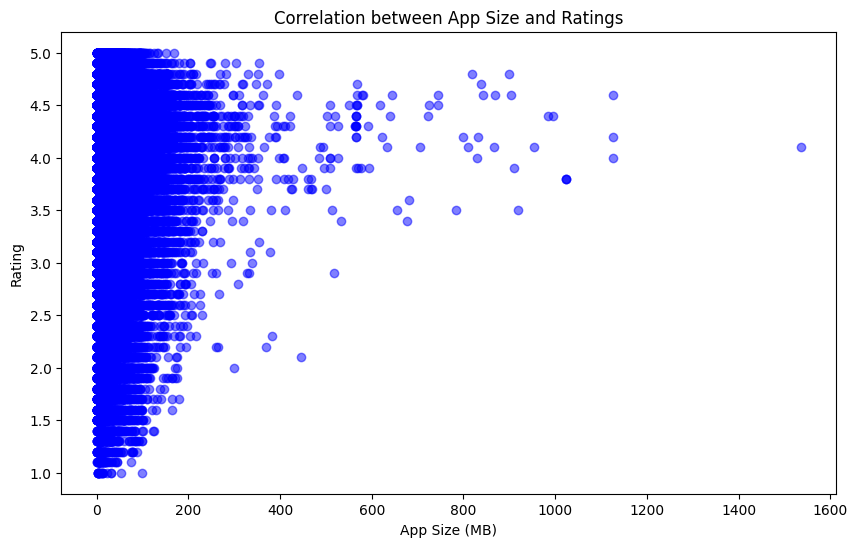

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Size(Mb)'], df['Rating'], color='blue', alpha=0.5)
plt.title('Correlation between App Size and Ratings')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')

plt.show()

In [32]:
df.loc[df["Size(Mb)"] == df["Size(Mb)"].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth,Year
105450,Titan Quest,com.dotemu.titanquest,Action,4.1,24339.0,100000.0,100000.0,223859.0,False,7.99,USD,1536.0,5.0 and up,HandyGames,2016-07-06,2021-05-17,Teen,False,True,False,8.95,2016-07,2021-05,2016.0


In [92]:
df.loc[df.Category == "Tools"].sort_values(by="Maximum Installs").tail(30)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size(Mb),Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price_EUR,Released_YearMonth,LastUpdated_YearMonth,Year
113651,"Google Go: A lighter, faster way to search",com.google.android.apps.searchlite,Tools,4.2,676144.0,5.000000e+08,5.000000e+08,5.735030e+08,True,0.0,USD,NaN,Varies with device,Google LLC,2019-08-19,2021-06-11,Everyone,False,False,False,0.0,2019-08,2021-06,2019.0
434782,Smart diagnosis,com.huawei.hwdetectrepair,Tools,4.1,45226.0,5.000000e+08,5.000000e+08,5.860742e+08,True,0.0,USD,15.0,7.0 and up,Huawei Internet Service,2019-01-29,2019-07-29,Everyone,False,False,False,0.0,2019-01,2019-07,2019.0
371541,HiCare,com.huawei.phoneservice,Tools,4.1,106450.0,5.000000e+08,5.000000e+08,6.434673e+08,True,0.0,USD,26.0,6.0 and up,Huawei Internet Services,2016-11-28,2020-03-10,Everyone,False,False,False,0.0,2016-11,2020-03,2016.0
376075,Huawei Mobile Services,com.huawei.hwid,Tools,4.2,452124.0,5.000000e+08,5.000000e+08,6.934058e+08,True,0.0,USD,103.0,4.4 and up,Huawei Internet Services,NaT,2020-05-14,Everyone,False,False,False,0.0,NaT,2020-05,NaN
239348,Huawei Backup,com.huawei.KoBackup,Tools,4.2,150490.0,5.000000e+08,5.000000e+08,7.311789e+08,True,0.0,USD,8.9,5.0 and up,Huawei Internet Services,2016-04-13,2020-02-10,Everyone,False,False,False,0.0,2016-04,2020-02,2016.0
193073,[Samsung] Always On Display,com.samsung.android.app.aodservice,Tools,4.3,128830.0,5.000000e+08,5.000000e+08,7.389350e+08,True,0.0,USD,NaN,Varies with device,"Samsung Electronics Co., Ltd.",2021-01-19,2021-03-29,Everyone,False,False,False,0.0,2021-01,2021-03,2021.0
40885,Phone by Google - Caller ID & Spam Protection,com.google.android.dialer,Tools,4.5,1475344.0,5.000000e+08,5.000000e+08,7.467565e+08,True,0.0,USD,NaN,Varies with device,Google LLC,2015-12-07,2021-06-04,Everyone,False,False,False,0.0,2015-12,2021-06,2015.0
32112,Google Lens,com.google.ar.lens,Tools,4.5,1050759.0,5.000000e+08,5.000000e+08,7.494822e+08,True,0.0,USD,NaN,6.0 and up,Google LLC,2018-06-04,2020-11-30,Everyone,False,False,False,0.0,2018-06,2020-11,2018.0
118474,Samsung Members,com.samsung.android.voc,Tools,4.4,802834.0,5.000000e+08,5.000000e+08,7.766118e+08,True,0.0,USD,NaN,Varies with device,"Samsung Electronics Co., Ltd.",2020-06-30,2021-06-07,Everyone,False,False,False,0.0,2020-06,2021-06,2020.0
72661,Calculator,com.miui.calculator,Tools,4.4,211550.0,5.000000e+08,5.000000e+08,7.833357e+08,True,0.0,USD,NaN,Varies with device,Xiaomi Inc.,2017-08-31,2020-12-24,Everyone,False,False,False,0.0,2017-08,2020-12,2017.0


In [93]:
df["Free"].value_counts()

Free
True     455518
False      4739
Name: count, dtype: int64

C:\Users\spilk\AppData\Local\Temp\ipykernel_5272\2236122835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Rating Count', palette='Set3')


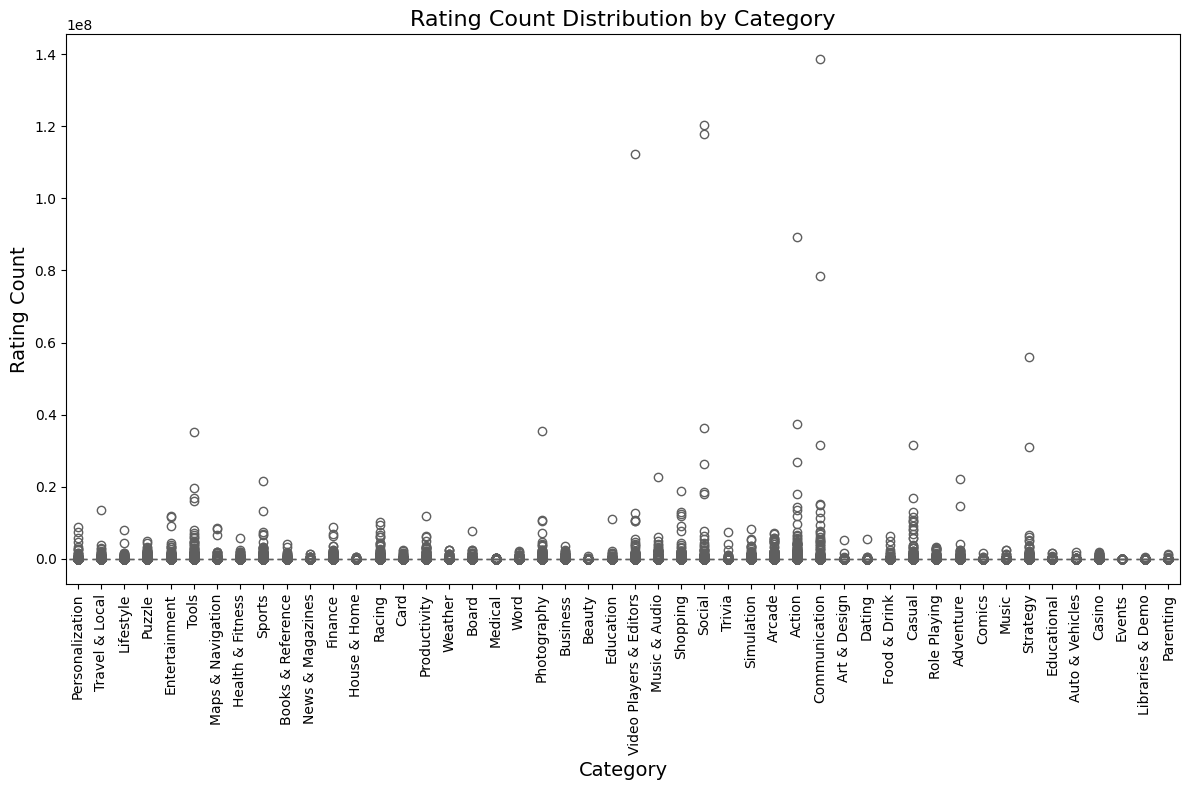

In [110]:
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(data=df, x='Category', y='Rating Count', palette='Set3')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating Count', fontsize=14)
plt.title('Rating Count Distribution by Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\spilk\AppData\Local\Temp\ipykernel_5272\1158836856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Rating Count', palette='Set3', showfliers=False)


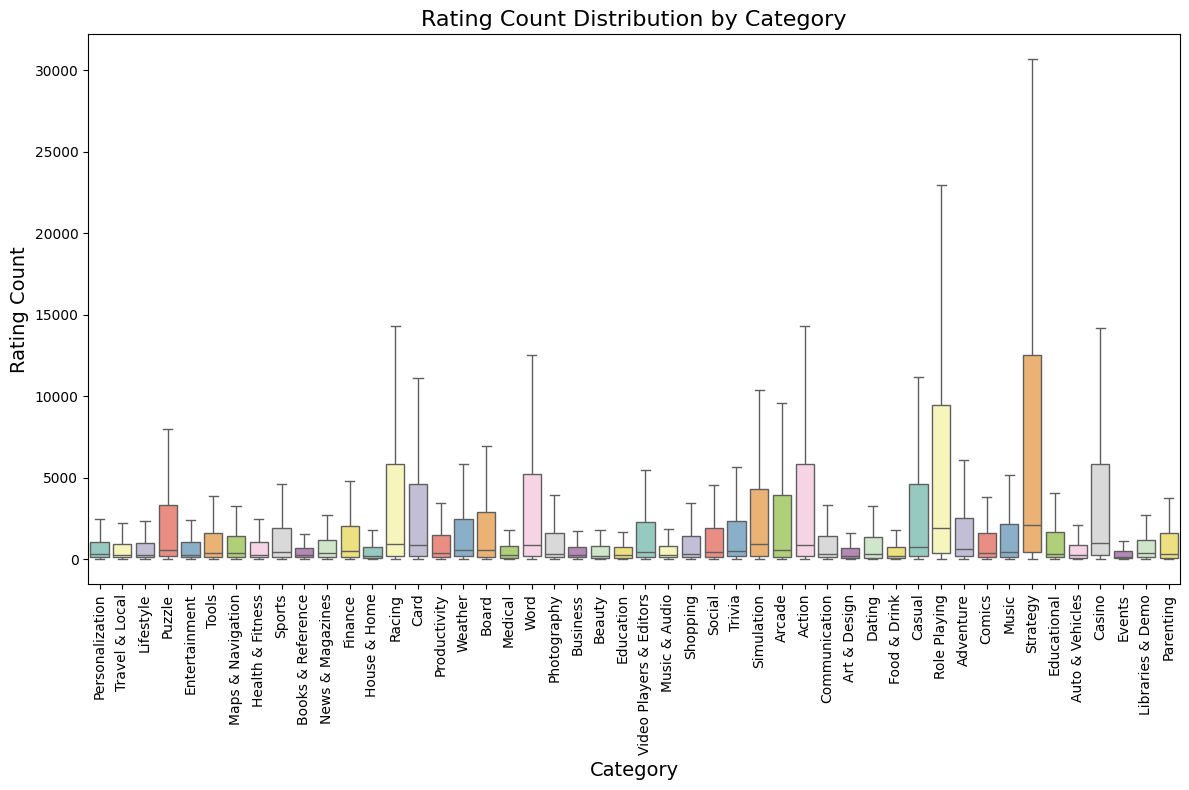

In [111]:
plt.figure(figsize=(12, 8))

# Create the boxplot without outliers
sns.boxplot(data=df, x='Category', y='Rating Count', palette='Set3', showfliers=False)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating Count', fontsize=14)
plt.title('Rating Count Distribution by Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\spilk\AppData\Local\Temp\ipykernel_5272\888323822.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_count_per_category.sort_values(by="Rating Count", ascending=False), x='Rating Count', y='Category', palette='Set3')


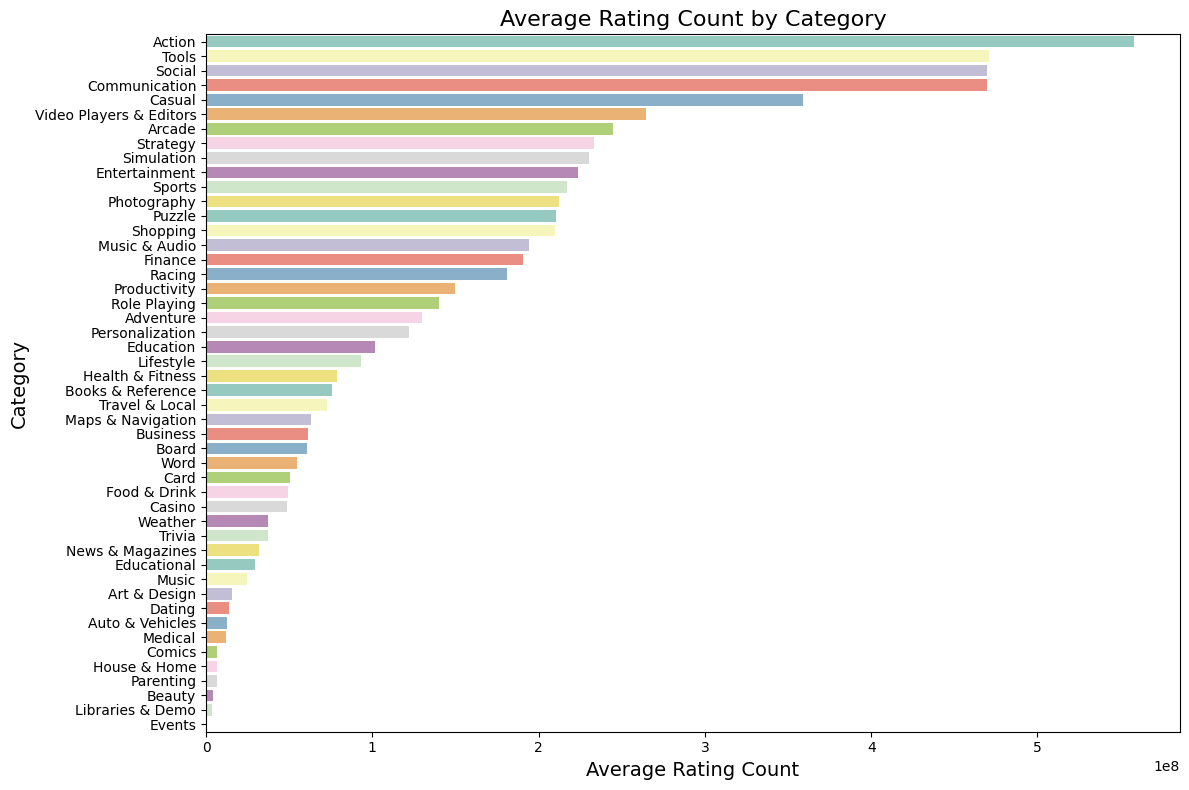

In [125]:
plt.figure(figsize=(12, 8))

# Calculate average rating count per category
avg_rating_count_per_category = df.groupby('Category')['Rating Count'].sum().reset_index()

# Create the bar plot
sns.barplot(data=avg_rating_count_per_category.sort_values(by="Rating Count", ascending=False), x='Rating Count', y='Category', palette='Set3')
plt.xlabel('Average Rating Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.title('Average Rating Count by Category', fontsize=16)
plt.tight_layout()

# Show plot
plt.show()

In [137]:
df["Rating"].loc[(df["Category"]=="Casual") ].mean()

3.917485967001191